# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
%%time
# Load pickled data
import pickle
# TODO: Fill this in based on where you saved the training and testing data

training_file = '../../../Udacity-SDC-dataset/traffic-sign-data/train.p'
validation_file = '../../../Udacity-SDC-dataset/traffic-sign-data/valid.p'
testing_file = '../../../Udacity-SDC-dataset/traffic-sign-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']


CPU times: user 80 ms, sys: 168 ms, total: 248 ms
Wall time: 115 ms


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
%%time
import numpy as np
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
#print(X_train.shape)
n_train = X_train.shape[0]

# TODO: Number of validation examples
#print(X_valid.shape)
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
#print(X_test.shape)
n_test = X_test.shape[0]
#n_total = n_train+n_validation+n_test

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
#print(set(y_train))
train_labels, train_counts = np.unique(y_train, return_counts=True)
test_labels, test_counts = np.unique(y_test, return_counts=True)
n_classes = len(train_labels)

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)


Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43
CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 1.86 ms


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [3]:
%%time
# reading sign name file
import pandas as pd
from IPython.display import display

label_file = 'signnames.csv'
#label = pd.read_csv(label_file)
label = pd.read_csv(label_file,index_col='ClassId')
SignName = label['SignName']
SignNames = list(SignName)
display(label.head())

y_train_series = pd.Series(y_train)
y_valid_series = pd.Series(y_valid)
y_test_series = pd.Series(y_test)

label['train_samples'] = y_train_series.value_counts()
label['valid_samples'] = y_valid_series.value_counts()
label['test_samples'] = y_test_series.value_counts()

sorted_label = label.sort_values('train_samples', ascending=False)
Sorted_SignName = sorted_label['SignName']
Sorted_SignNames = list(Sorted_SignName)
print('First 3 ID which Occur the Most')
display(sorted_label.head(3))
print('Last 3 ID which Occur the Least')
display(sorted_label.tail(3))


,SignName
ClassId,
0,Speed limit (20km/h)
1,Speed limit (30km/h)
2,Speed limit (50km/h)
3,Speed limit (60km/h)
4,Speed limit (70km/h)


First 3 ID which Occur the Most


,SignName,train_samples,valid_samples,test_samples
ClassId,,,,
2,Speed limit (50km/h),2010,240,750
1,Speed limit (30km/h),1980,240,720
13,Yield,1920,240,720


Last 3 ID which Occur the Least


,SignName,train_samples,valid_samples,test_samples
ClassId,,,,
37,Go straight or left,180,30,60
19,Dangerous curve to the left,180,30,60
0,Speed limit (20km/h),180,30,60


CPU times: user 160 ms, sys: 20 ms, total: 180 ms
Wall time: 182 ms


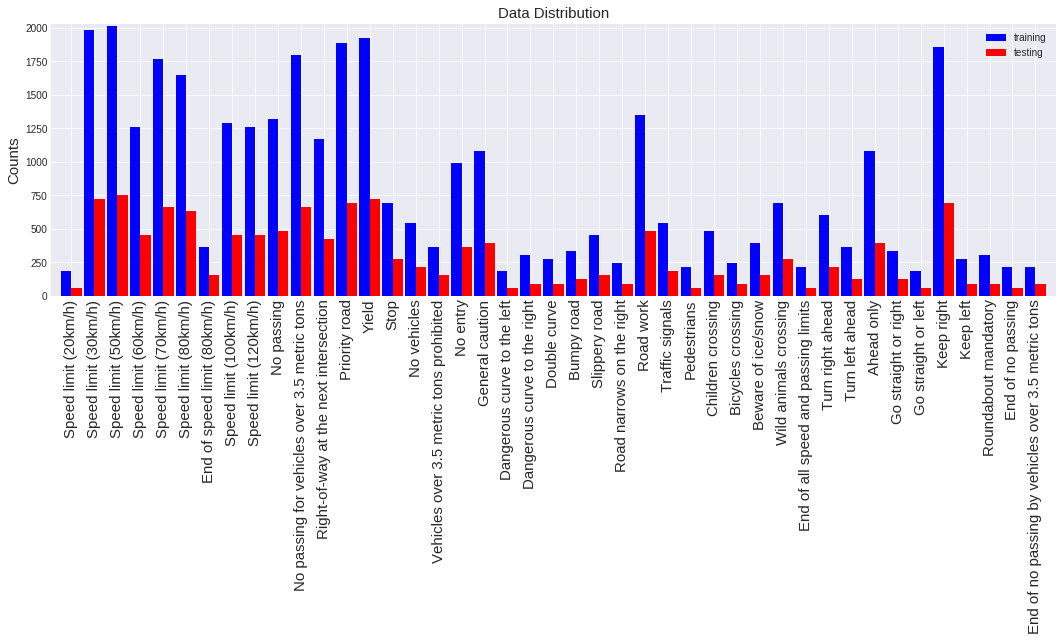

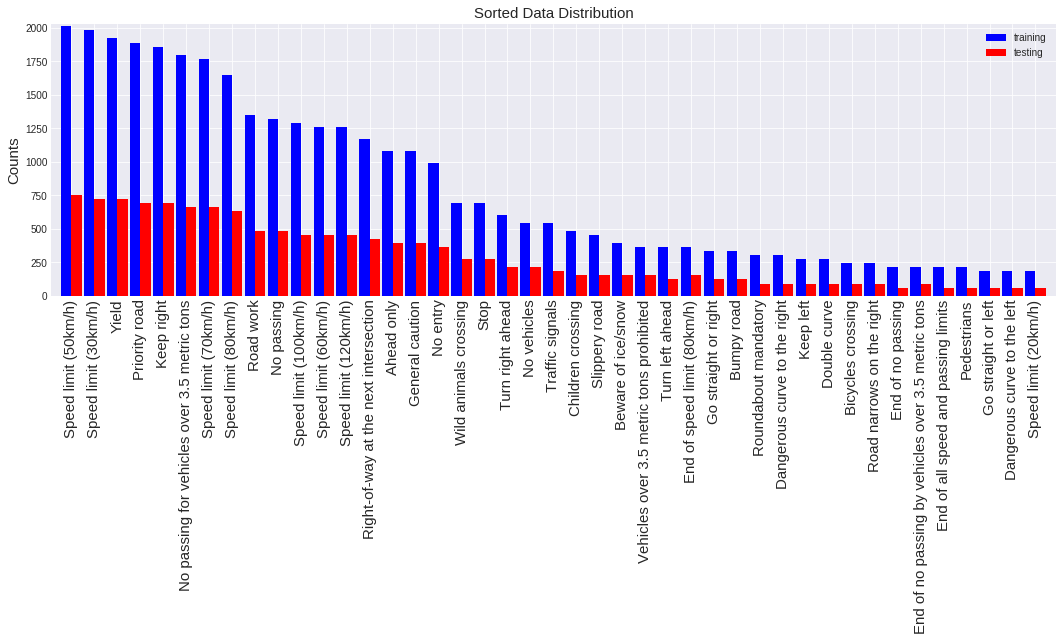

CPU times: user 1.13 s, sys: 592 ms, total: 1.72 s
Wall time: 1.05 s


In [4]:
%%time
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

def plot(train_labels, train_counts, test_counts, SignNames, plot_title):
    plt.style.use(('seaborn-darkgrid'))
    plt.figure(figsize=(18, 5))
    plt.bar(train_labels, train_counts, tick_label=train_labels, width=-0.45, align='edge', color='b',
            label='training')
    plt.bar(train_labels, test_counts, tick_label=train_labels, width=0.45, align='edge', color='r',
            label='testing')
    plt.title('{}'.format(plot_title), fontsize=15)
    plt.xticks(train_labels, SignNames, rotation='vertical', fontsize=15)
    plt.ylabel("Counts", fontsize=15)
    plt.legend()
    plt.margins(0.01)
    plt.show()
    
plot(train_labels, train_counts, test_counts, SignNames, 'Data Distribution')
plot(train_labels, sorted_label['train_samples'], sorted_label['test_samples'], Sorted_SignNames, 
     'Sorted Data Distribution')

From the plot above, we can see that the test set is equally unbalanced as the training set.

In [5]:
# plot function
def plot_img(X_train, y_train, ClassId):
    f, ax = plt.subplots(1, 10, figsize=(20, 20))
    for i in range(ax.size):
        #ax[i].imshow(X_train[y_train == ClassId][np.random.randint(0, 180)])
        ax[i].imshow(X_train[y_train == ClassId][i].squeeze())
        ax[i].axis('off')
        ax[i].set_title('{}'.format(i))
    plt.show()

Class ID0: Speed limit (20km/h)


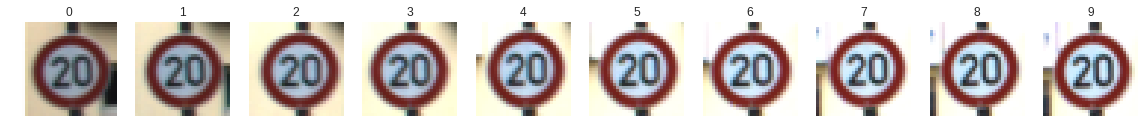

Class ID1: Speed limit (30km/h)


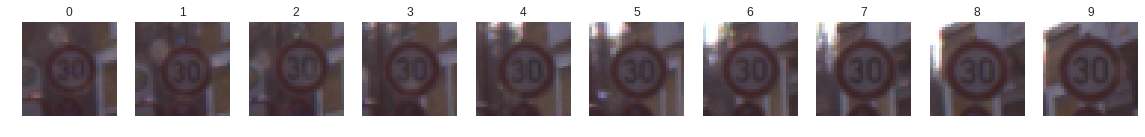

Class ID41: End of no passing


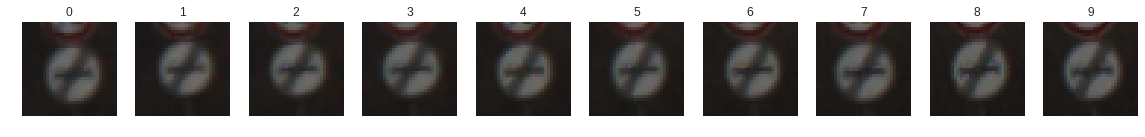

Class ID42: End of no passing by vehicles over 3.5 metric tons


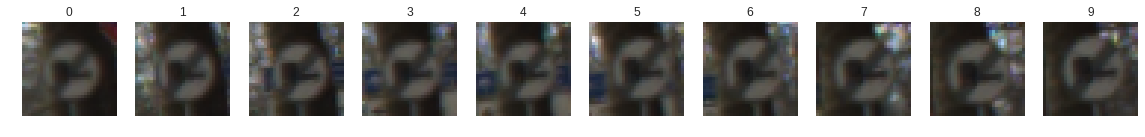

CPU times: user 2.42 s, sys: 1.04 s, total: 3.46 s
Wall time: 2.24 s


In [6]:
%%time
from tqdm import tqdm
# showing first and last 3 classes
ID_list = [0, 1, 41, 42]

for ID in ID_list:
    print('Class ID{}: {}'.format(ID, SignNames[ID]))
    plot_img(X_train, y_train, ID)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

#### Preprocess functions

In [7]:
import cv2
from tqdm import tqdm
from skimage import exposure

def grayscale(img):
    """Applies the Grayscale transform
    This will return an image with only one color channel
    but NOTE: to see the returned image as grayscale
    you should call plt.imshow(gray, cmap='gray')"""
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

def normalize_image(img):
    img = (img / 255.).astype(np.float32)
    return exposure.equalize_adapthist(img, clip_limit=0.03)

def preprocess_img(img):
    gray_img = grayscale(img)
    normal_img = normalize_image(gray_img)
    normal_img = normal_img.reshape(normal_img.shape + (1,))
    return normal_img

def preprocessing_all(X):
    X_out = np.empty((X.shape[0],X.shape[1],X.shape[2],1)).astype(np.float32) 
    for idx, img in tqdm(enumerate(X)):
        X_out[idx] = preprocess_img(img)
    return X_out 
    

#### Preprocess Training Data

In [ ]:
%%time
X_train_prep = preprocessing_all(X_train)

#### Preprocess Validation Data

In [ ]:
%%time
X_valid_prep = preprocessing_all(X_valid)

#### Preprocess Test Data

In [ ]:
%%time
X_test_prep = preprocessing_all(X_test)

#### Save Pre-Processed Data

In [ ]:
pre_training_file = '../../../Udacity-SDC-dataset/traffic-sign-data/pre_train.p'
pre_valid_file = '../../../Udacity-SDC-dataset/traffic-sign-data/pre_valid.p'
pre_test_file = '../../../Udacity-SDC-dataset/traffic-sign-data/pre_test.p'

pickle.dump({
        "features" : X_train_prep,
        "labels" : y_train
    }, open(pre_training_file, "wb" ) )
print('preprocessed data saved')

pickle.dump({
        "features" : X_valid_prep,
        "labels" : y_valid
    }, open(pre_valid_file, "wb" ) )
print('preprocessed data saved')

pickle.dump({
        "features" : X_test_prep,
        "labels" : y_test
    }, open(pre_test_file, "wb" ) )
print('preprocessed data saved')

#### Load the Pre-Processed Data

Class ID0: Speed limit (20km/h)


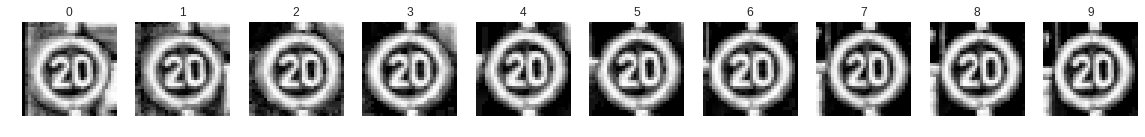

Class ID1: Speed limit (30km/h)


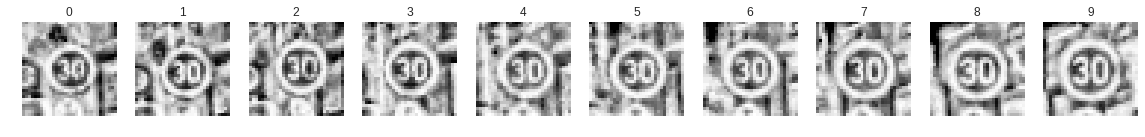

Class ID41: End of no passing


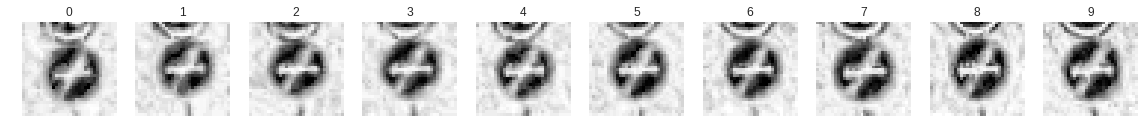

Class ID42: End of no passing by vehicles over 3.5 metric tons


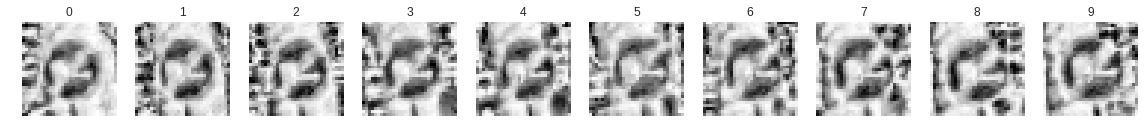

In [7]:
pre_training_file = '../../../Udacity-SDC-dataset/traffic-sign-data/pre_train.p'
pre_validation_file = '../../../Udacity-SDC-dataset/traffic-sign-data/pre_valid.p'
pre_test_file = '../../../Udacity-SDC-dataset/traffic-sign-data/pre_test.p'

with open(pre_training_file, mode='rb') as f:
    train = pickle.load(f)

X_train_prep, y_train_prep = train['features'], train['labels']

with open(pre_validation_file, mode='rb') as f:
    valid = pickle.load(f)

X_valid_prep, y_valid_prep = valid['features'], valid['labels']

with open(pre_test_file, mode='rb') as f:
    test = pickle.load(f)

X_test_prep, y_test_prep = test['features'], test['labels']

for ID in ID_list:
    print('Class ID{}: {}'.format(ID, SignNames[ID]))
    plot_img(X_train_prep, y_train_prep, ID)

#### Data Augmentation

In [8]:
%%time
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import random

datagen = ImageDataGenerator(
        rotation_range=10,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.2,
        horizontal_flip=False,
        dim_ordering='tf',
        fill_mode='nearest')

for X_batch, y_batch in datagen.flow(X_train_prep, y_train_prep, batch_size=X_train.shape[0], shuffle=False):
    print(X_batch.shape)
    X_train_aug = X_batch#.astype('uint8')
    y_train_aug = y_batch
    break

Using TensorFlow backend.


(34799, 32, 32, 1)
CPU times: user 4.4 s, sys: 60 ms, total: 4.46 s
Wall time: 4.51 s


#### Image Blurring

In [9]:
%%time
import cv2
def blur(X):
    X_out = np.empty((X.shape[0],X.shape[1],X.shape[2],1)).astype(np.float32) 
    print(X_out.shape)
    for i, img in enumerate(X):
        blur_img = cv2.blur(img,(3,3))
        blur_img = blur_img.reshape(blur_img.shape + (1,))
        X_out[i] = blur_img
    return X_out
X_train_blur = blur(X_train_prep)

(34799, 32, 32, 1)
CPU times: user 244 ms, sys: 20 ms, total: 264 ms
Wall time: 296 ms


#### Save Argumented Data

In [ ]:
aug_training_file = '../../../Udacity-SDC-dataset/traffic-sign-data/aug_train.p'
blur_training_file = '../../../Udacity-SDC-dataset/traffic-sign-data/blur_train.p'

pickle.dump({
        "features" : X_train_aug,
        "labels" : y_train_aug
    }, open(aug_training_file, "wb" ) )
pickle.dump({
        "features" : X_train_blur,
        "labels" : y_train_prep
    }, open(blur_training_file, "wb" ) )

print('augmented and blur data saved')

### Load All Data

 ### start from this cell if the data is processed

In [8]:
import numpy as np
import pickle
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

aug_training_file = '../../../Udacity-SDC-dataset/traffic-sign-data/aug_train.p'
blur_training_file = '../../../Udacity-SDC-dataset/traffic-sign-data/blur_train.p'
pre_training_file = '../../../Udacity-SDC-dataset/traffic-sign-data/pre_train.p'
pre_validation_file = '../../../Udacity-SDC-dataset/traffic-sign-data/pre_valid.p'
pre_test_file = '../../../Udacity-SDC-dataset/traffic-sign-data/pre_test.p'

with open(pre_training_file, mode='rb') as f:
    train = pickle.load(f)

X_train_prep, y_train_prep = train['features'], train['labels']

with open(pre_validation_file, mode='rb') as f:
    valid = pickle.load(f)

X_valid_prep, y_valid_prep = valid['features'], valid['labels']

with open(pre_test_file, mode='rb') as f:
    test = pickle.load(f)

X_test_prep, y_test_prep = test['features'], test['labels']

with open(aug_training_file, mode='rb') as f:
    train = pickle.load(f)

X_train_aug, y_train_aug = train['features'], train['labels']

with open(blur_training_file, mode='rb') as f:
    train = pickle.load(f)

X_train_blur, y_train_blur = train['features'], train['labels']
 

#### Concatenate all training data

X_train after combined: (104397, 32, 32, 1)
Class ID0: Speed limit (20km/h)


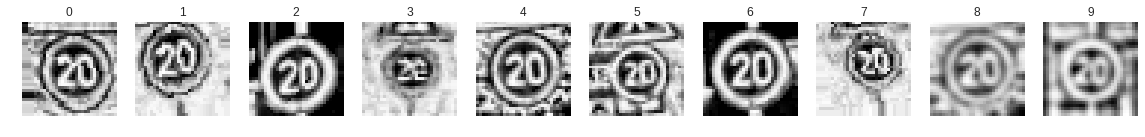

Class ID1: Speed limit (30km/h)


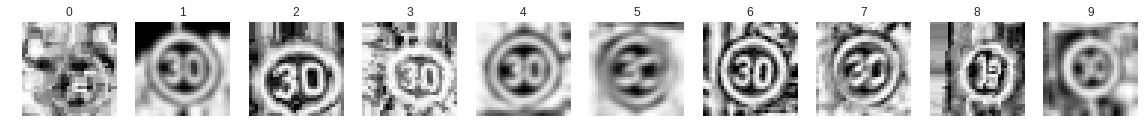

Class ID41: End of no passing


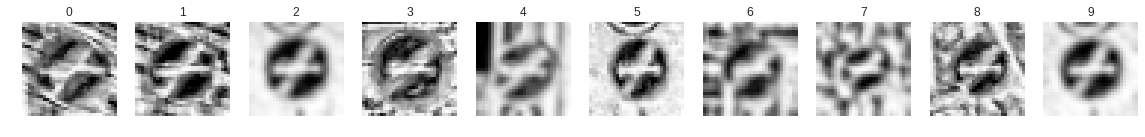

Class ID42: End of no passing by vehicles over 3.5 metric tons


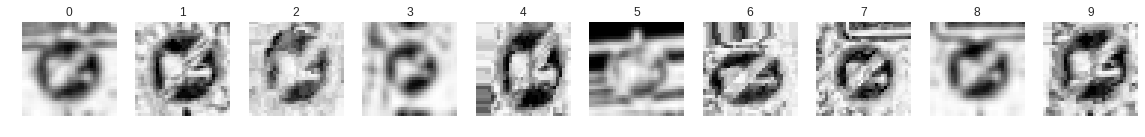

In [9]:
from sklearn.utils import shuffle
X_train_combined = np.concatenate((X_train_prep, X_train_aug,X_train_blur), axis=0)
y_train_ombined = np.concatenate((y_train_prep, y_train_aug,y_train_blur), axis=0)

X_train_combined, y_train_ombined = shuffle(X_train_combined, y_train_ombined)
print('X_train after combined: {}'.format(X_train_combined.shape))

for ID in ID_list:
    print('Class ID{}: {}'.format(ID, SignNames[ID]))
    plot_img(X_train_combined, y_train_ombined, ID)  

### Model Architecture

#### Setup TensorFlow

In [43]:
import tensorflow as tf

EPOCHS = 30
BATCH_SIZE = 128

#### Store layers weight & bias

In [11]:
weights = {
    'wc1': tf.get_variable('wc1', shape = (5, 5, 1, 12), initializer = tf.contrib.layers.xavier_initializer()),
    'wc2': tf.get_variable('wc2', shape = (5, 5, 12, 24), initializer = tf.contrib.layers.xavier_initializer()),
    'wd1': tf.get_variable('wd1', shape = (1188, 320), initializer = tf.contrib.layers.xavier_initializer()),
    'out': tf.get_variable('out', shape = (320, n_classes), initializer = tf.contrib.layers.xavier_initializer())
}
biases = {
   'bc1': tf.Variable(tf.zeros(12)),
   'bc2': tf.Variable(tf.zeros(24)),
   'bd1': tf.Variable(tf.zeros(320)),
   'out': tf.Variable(tf.zeros(n_classes))
}

#### Conv and pooling functions

In [12]:
def conv_relu(x, W, b, strides=1):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='VALID')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)

def maxpool(x, k=2):
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1], padding='VALID')

def dropout(x, keep_prob, apply_dropout):
    return tf.cond(apply_dropout, lambda: tf.nn.dropout(x, keep_prob), lambda: x)

def flatten(x):
    shape = x.get_shape().as_list()
    return tf.reshape(x, [-1, shape[1] * shape[2] * shape[3]])

#### Setup Architecture

In [13]:
from tensorflow.contrib.layers import flatten

def conv_net(x, weights, biases, apply_dropout):
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x12.
    print('Input shape: {} X {} X {}'.format(x.shape[1], x.shape[2], x.shape[3]))
    conv1 = conv_relu(x, weights['wc1'], biases['bc1'])
    print('First convolution shape: {} X {} X {}'.format(conv1.shape[1], conv1.shape[1], conv1.shape[3]))
    # Pooling layer 1: Input = 28x28x12. Output = 14x14x12.
    conv1 = maxpool(conv1, k=2)
    print('First pooling shape: {} X {} X {}'.format(conv1.shape[1], conv1.shape[1], conv1.shape[3]))
    conv1 = dropout(conv1, keep_prob = 0.8, apply_dropout = apply_dropout)

    # Layer 2: Convolutional. Input = 14x14x12. Output = 10x10x24.
    conv2 = conv_relu(conv1, weights['wc2'], biases['bc2'])
    print('Second convolution shape: {} X {} X {}'.format(conv2.shape[1], conv2.shape[1], conv2.shape[3]))
    
    # Pooling layer 2: Input = 10x10x24. Output = 5x5x24.
    conv2 = maxpool(conv2, k=2)
    print('Second pooling shape: {} X {} X {}'.format(conv2.shape[1], conv2.shape[1], conv2.shape[3]))
    conv2 = dropout(conv2, keep_prob = 0.7, apply_dropout = apply_dropout)

    # Input = 14x14x12. Output = 7x7x12 = 588
    conv1_1 = maxpool(conv1, k=2)
    print('Pooling after first pooling shape: {} X {} X {}'.format(
        conv1_1.shape[1], conv1_1.shape[1], conv1_1.shape[3]))
    conv1_1 = flatten(conv1_1)
    print('First flatten shape: 1 X {}'.format(conv1_1.shape[1]))
    
    # Flatten conv2 Input = 5x5x24. Output = 600
    conv2 = flatten(conv2)
    print('Second flatten shape: 1 X {}'.format(conv2.shape[1]))
    fc0 = tf.concat(axis = 1, values = [conv1_1, conv2])
    print('Concat flatten shapes: 1 X {}'.format(fc0.shape[1]))
    
    # Layer 3: Fully Connected. Input = 588+600 = 1188. Output = 320
    fc1 = tf.matmul(fc0, weights['wd1']) + biases['bd1']
    print('Fully connected shape: 1 X {}'.format(fc1.shape[1]))
    fc1 = tf.nn.relu(fc1)
    fc1 = dropout(fc1, keep_prob = 0.6, apply_dropout = apply_dropout)

    logits = tf.matmul(fc1, weights['out']) + biases['out']
    print('Finaly shape: 1 X {}'.format(logits.shape[1]))
    return logits

#### Features and Labels

In [44]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)
print (one_hot_y)
# only appply dropout in training mode
apply_dropout = tf.placeholder(tf.bool)

Tensor("one_hot_5:0", dtype=float32)


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

#### Training Pipeline

In [45]:
%%time
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
rate = 0.001

beta = 0.001

logits = conv_net(x, weights, biases, apply_dropout)

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = one_hot_y)

loss_operation = tf.reduce_mean(cross_entropy)

regularizer = tf.reduce_sum([tf.nn.l2_loss(weights['wc1']),
                             tf.nn.l2_loss(weights['wc2']),
                             tf.nn.l2_loss(weights['wd1']),
                             tf.nn.l2_loss(weights['out'])])

loss = tf.reduce_mean(loss_operation + beta * regularizer)

optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss)

Input shape: 32 X 32 X 1
First convolution shape: 28 X 28 X 12
First pooling shape: 14 X 14 X 12
Second convolution shape: 10 X 10 X 24
Second pooling shape: 5 X 5 X 24
Pooling after first pooling shape: 7 X 7 X 12
First flatten shape: 1 X 588
Second flatten shape: 1 X 600
Concat flatten shapes: 1 X 1188
Fully connected shape: 1 X 320
Finaly shape: 1 X 43
CPU times: user 192 ms, sys: 8 ms, total: 200 ms
Wall time: 202 ms


#### Model Evaluation

In [46]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, apply_dropout: False})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

#### Train the Model

In [47]:
%%time
global best_validation_accuracy
best_validation_accuracy = 0.0
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_prep)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train_prep, y_train_prep = shuffle(X_train_prep, y_train_prep)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_prep[offset:end], y_train_prep[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, apply_dropout: True })
            
        validation_accuracy = evaluate(X_valid_prep, y_valid_prep)
        training_accuracy = evaluate(X_train_prep, y_train_prep)
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
    saver.save(sess, './lenet')
    print("Model saved")    

Training...

EPOCH 1 ...
Training Accuracy = 0.913
Validation Accuracy = 0.877

EPOCH 2 ...
Training Accuracy = 0.971
Validation Accuracy = 0.937

EPOCH 3 ...
Training Accuracy = 0.981
Validation Accuracy = 0.949

EPOCH 4 ...
Training Accuracy = 0.990
Validation Accuracy = 0.966

EPOCH 5 ...
Training Accuracy = 0.990
Validation Accuracy = 0.964

EPOCH 6 ...
Training Accuracy = 0.992
Validation Accuracy = 0.968

EPOCH 7 ...
Training Accuracy = 0.995
Validation Accuracy = 0.974

EPOCH 8 ...
Training Accuracy = 0.996
Validation Accuracy = 0.973

EPOCH 9 ...
Training Accuracy = 0.996
Validation Accuracy = 0.973

EPOCH 10 ...
Training Accuracy = 0.997
Validation Accuracy = 0.970

EPOCH 11 ...
Training Accuracy = 0.997
Validation Accuracy = 0.973

EPOCH 12 ...
Training Accuracy = 0.998
Validation Accuracy = 0.967

EPOCH 13 ...
Training Accuracy = 0.997
Validation Accuracy = 0.970

EPOCH 14 ...
Training Accuracy = 0.997
Validation Accuracy = 0.970

EPOCH 15 ...
Training Accuracy = 0.997
Valid

### Evaluate the Model

In [48]:
%%time
with tf.Session() as sess:
    #saver.restore(sess, tf.train.latest_checkpoint('.'))
    saver.restore(sess, './lenet')

    training_accuracy = evaluate(X_train_prep, y_train_prep)
    print("Training Accuracy = {:.3f}".format(training_accuracy))
    validation_accuracy = evaluate(X_valid_prep, y_valid_prep)
    print("Validation Accuracy = {:.3f}".format(validation_accuracy))

    test_accuracy = evaluate(X_test_prep, y_test_prep)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    
    #metrics
    y_p = tf.argmax(logits, 1)
    y_pred = sess.run( y_p, feed_dict={x: X_test_prep, y: y_test_prep, apply_dropout: False})

INFO:tensorflow:Restoring parameters from ./lenet
Training Accuracy = 0.998
Validation Accuracy = 0.971
Test Accuracy = 0.967
CPU times: user 1.19 s, sys: 160 ms, total: 1.35 s
Wall time: 1.12 s


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [82]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import os
import matplotlib.image as mpimg
import cv2
images = os.listdir("new_images/")
images.sort()
print(images)

['12.png', '14.png', '15.png', '22.png', '24.png', '26.png', '31.png', '37.png', '41.png']


(9, 32, 32, 4)


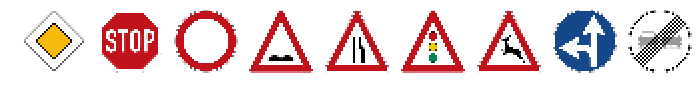

In [83]:
X_new = []
plt.figure(figsize=[12, 6])
#The optional argument allows us to tell enumerate from where to start the index.
for i, image in enumerate(images, 1):
    img = mpimg.imread('new_images/' + image)
    img = cv2.resize(img, (32, 32))
    X_new.append(img) 
    plt.subplot(1, 9, i)
    plt.axis('off')
    plt.imshow(img)

X_new = np.asarray(X_new)
print(X_new.shape)

In [36]:
%%time
X_new_prep = preprocessing_all(X_new)
print(X_new_prep.shape)

0it [00:00, ?it/s]/usr/local/lib/python3.5/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float32 to uint16
  .format(dtypeobj_in, dtypeobj_out))
9it [00:00, 112.58it/s]

CPU times: user 88 ms, sys: 0 ns, total: 88 ms
Wall time: 90.5 ms


### Save as pickle

In [38]:
new_img_file = 'new_img.p'

y_new = [12, 14, 15, 
         22, 24, 26,
         31, 37, 41
        ]

pickle.dump({
        "features" : X_new_prep,
        "labels" : y_new
    }, open(new_img_file, "wb" ) )
print('new imgs saved')

new imgs saved


### Load new imgs pickle

In [80]:
new_img_file = 'new_img.p'

with open(new_img_file, mode='rb') as f:
    train = pickle.load(f)

X_new_prep, y_new = train['features'], train['labels']
print(X_new_prep.shape)

y_new_name = []
for ID in y_new:
    y_new_name.append(SignNames[ID])
print(y_new_name)

(9, 32, 32, 1)
['Priority road', 'Stop', 'No vehicles', 'Bumpy road', 'Road narrows on the right', 'Traffic signals', 'Wild animals crossing', 'Go straight or left', 'End of no passing']


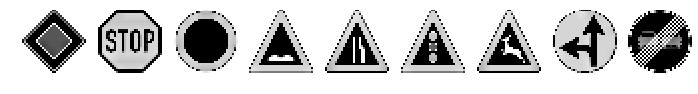

In [68]:
plt.figure(figsize=[12, 6])
for i, img in enumerate(X_new_prep, 1):
    plt.subplot(1, 9, i)
    plt.axis('off')
    plt.imshow(img.squeeze())

### Analyze Performance

In [41]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    saver.restore(sess, "./lenet")
    new_accuracy = evaluate(X_new_prep, y_new)
    print("Test Set Accuracy = {:.3f}".format(new_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Set Accuracy = 1.000


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

INFO:tensorflow:Restoring parameters from ./lenet


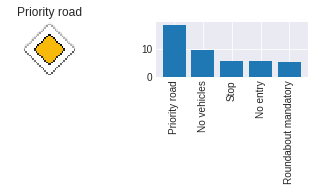

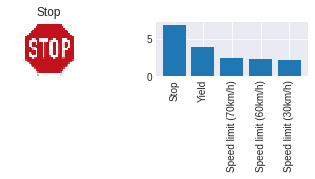

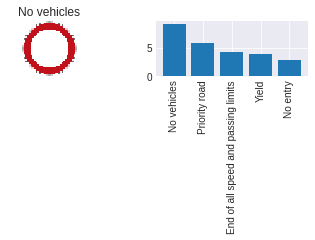

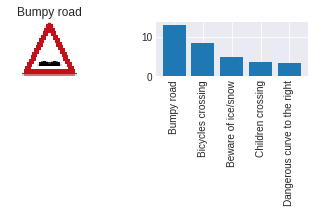

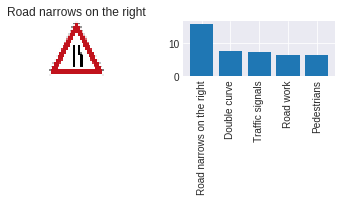

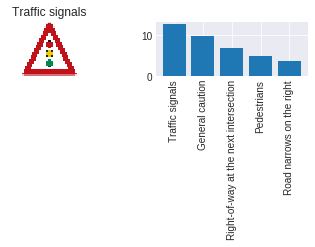

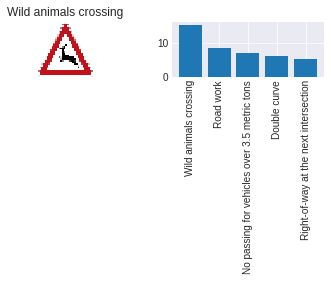

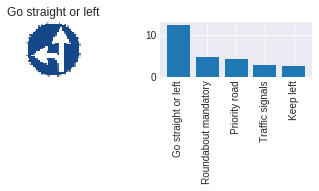

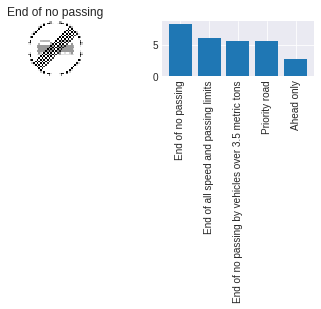

In [81]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
import matplotlib.gridspec as gridspec

feed_dict_new = feed_dict={x: X_new_prep, y: y_new, apply_dropout: False}
with tf.Session() as sess:
    saver.restore(sess, './lenet')
    predictions = sess.run(logits,feed_dict = feed_dict_new)
    top5_pred = sess.run([logits, tf.nn.top_k(logits, 5)], feed_dict=feed_dict_new)

for i, img in enumerate(X_new):
    plt.figure(figsize = (6,1))
    plt.subplot(1, 2, 1)
    plt.axis('off')
    plt.title(y_new_name[i])
    plt.imshow(img)
    Sign_pred = []
    for id in (top5_pred[1][1][i]):
        Sign_pred.append(SignNames[id])
    plt.subplot(1, 2, 2)
    plt.bar(np.arange(5),top5_pred[1][0][i], align='center')
    plt.xticks(np.arange(5), Sign_pred, rotation='vertical')
    plt.show()

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")